In [ ]:
# classification Model =>steps
1.x,y variable 
2.train_test_split
3.model fit
4.predection
5.Evalution
=>Confusion matrix,
TP, TN,FP,FN

6.Accuracy
correct predection/total predection
TP+TN/(TP+TN+FP+FN)

In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.isnull().sum()    

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df.shape

(768, 9)

In [28]:
target_count=df.Outcome .value_counts() # to see the class imbalance problem 
target_count

Outcome
0    500
1    268
Name: count, dtype: int64

here the  outcome has 500 0 and 268 1 which makes it class imbalance(frequency of 0 rw 1 count garne)

In [6]:
x=df[['Age']]
y=df.Outcome

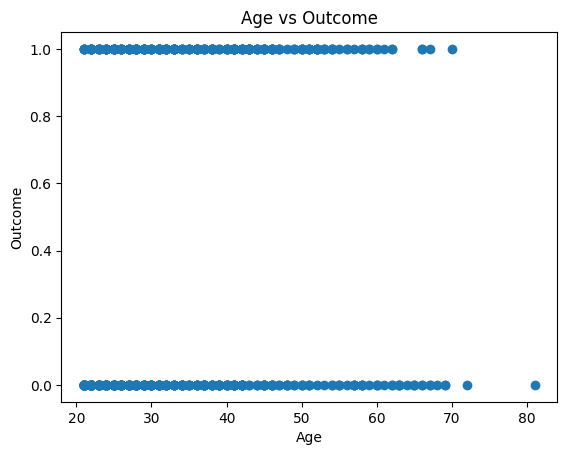

In [7]:
plt.scatter(df.Age,df.Outcome)  # y is the target variable 
plt.xlabel('Age')
plt.title('Age vs Outcome')
plt.ylabel('Outcome')
plt.show()

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=25)

In [9]:
log_model=LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [10]:

pred_new=pd.DataFrame({
    'Age':[50]
})

In [11]:
predicted_class =log_model.predict(pred_new)                                   # to know the predection  
print(predicted_class)

[1]


In [12]:
predicted_probabilities = log_model.predict_proba(pred_new)           # this help in dispalying the prob of each class either 0 or 1 
print("Predicted Probabilities:", predicted_probabilities) 

Predicted Probabilities: [[0.49137472 0.50862528]]


In [13]:
xtest



,Age
459,81
39,56
344,57
84,37
700,26
...,...
410,28
114,39
246,41
506,35


In [19]:
ypredection=log_model.predict(xtest)
ypredection

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [20]:
accuracy=accuracy_score(ytest,ypredection)
print(f'Accuracy:{accuracy*100}')

Accuracy:64.28571428571429


In [34]:
# precision
precision=precision_score(ytest,ypredection)
print(f'Precision:{precision*100}')

Precision:37.5


In [ ]:
# Intreperation  of above precision: out of total positive predection , only 37% are actual positive

In [36]:
#Recall
recall=recall_score(ytest,ypredection)
print(f'recall:{recall:.2%}')

recall:11.76%


In [ ]:
# Intreperation of recall:out of total actual positive model can only capture 12%
TP/(TP+FN)

In [37]:
f1_score=f1_score(ytest,ypredection)
print(f'f1_score:{f1_score:.2%}')

f1_score:17.91%


In [16]:
cm=confusion_matrix(ytest,ypredection)

In [17]:
cm

array([[93, 10],
       [45,  6]])

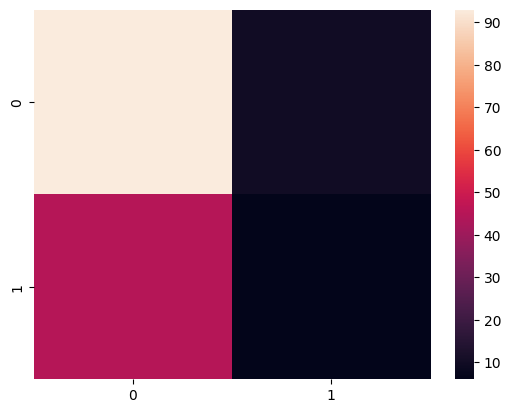

In [24]:
sns.heatmap(cm)
plt.show()

In [ ]:
# same mathi ko figure ho ali dherai description ho 

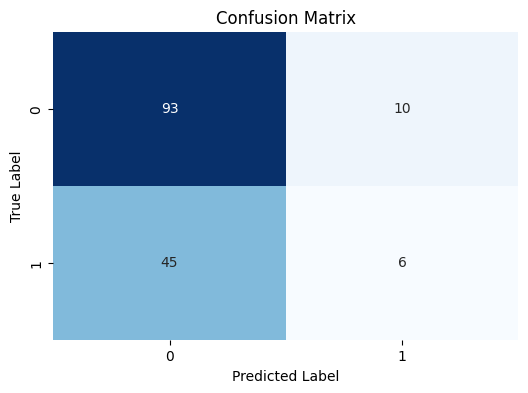

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) # annote = true ko lekhye vanyo 93, 10 haru wala figure ma ayuxa
plt.xlabel('Predicted Label')                                   # yesle cbar mathi ko bar lai remove garxa  
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
                          # actual is always in rows in the confusion matrix 

- other evaluation 
2.Precision
3.Recall
4.F1 Score

In [ ]:
# class imbalance =>row ma data xa tini haru ko 
 Assume , 100rows xa=> 90 ota ko label chai 0 xa
                10 ota chai 1 xa yei problem lai class imbalance problem vaninxa  

=> yesto vayepacchi model ley 0 wala data chai dherai dekhyo teslai(or trained) ramro sanga classify garna sakxa but struggle for class 1
due to less data trained 



In [31]:
xtrain

,Age
118,22
336,44
374,28
518,41
716,31
...,...
317,29
143,42
474,24
318,28


In [30]:
ytrain

118    0
336    0
374    0
518    0
716    1
      ..
317    1
143    1
474    0
318    0
132    1
Name: Outcome, Length: 614, dtype: int64

In [32]:
train_count=ytrain.value_counts()
train_count

Outcome
0    397
1    217
Name: count, dtype: int64

In [ ]:
90- negative(0)
10-positive(1)

In [ ]:
TP=5              FP=5
FN=5              TN=85

In [ ]:
In this case accuracy is 90% but this is class imbalance case  

# Precision
=>TP/(TP+FP):
-Out of positive predection how much is actual positive
-(model ley positive prediction ta garyo tesma ni kati chai true raiccha ) 
5/10= 0.5:50% this means out of total positive predection case 50 % predection are wrong

# Recall
TP/TP+FN: how much positive cases , model can capture 
5/10= 0.5=50%  #
-yesma chai model ley total ma 50 % positive case matrw
-case positive predection aru positive predection lai cahi negative vandiyo  
vandiyo  which is not fruitful model 

In [ ]:
F1_score=> precision rw recall ko harmonic mean ho 
formula:
2*precision*recall/(precision+recall)


=> we need both precision and recall to be high for the good evaluation 


In [ ]:
# now for tomorrow 
=> knn start 
